<a href="https://colab.research.google.com/github/joseeden/joeden/blob/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/003-Investigating-Netflix-Movies/netflix-movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating Netflix Movies

<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. 

- What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration (use 1990 as the decade's start year).

- A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

## The data

**netflix_data.csv**

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Approach 

1. Filter the data for type equals to movies (there are other types)
2. Filter for movies released in the 1990s
3. Find the most frequent movie duration
4. Count the number of short action movies from the 1990s

## Most Frequent Movie Duration 

Use subsetting to get filter for movies that are released during 1990s (between years 1989 and 2000), then retrieve just the specific columns (title, release_year, duration)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("./netflix_data.csv")


movies = netflix_df[
  netflix_df["type"] == "Movie"
]

movies_1990s = movies[
  (movies["release_year"] >= 1990) & (movies["release_year"] < 2000)
]

print(movies_1990s.iloc[
  :,
  [2,7,8]
])

                                title  release_year  duration
6                                 187          1997       119
118                 A Dangerous Woman          1993       101
145            A Night at the Roxbury          1998        82
167   A Thin Line Between Love & Hate          1996       108
194                      Aashik Awara          1993       154
...                               ...           ...       ...
4672                      West Beirut          1999       106
4689      What's Eating Gilbert Grape          1993       118
4718                   Wild Wild West          1999       106
4746                       Wyatt Earp          1994       191
4756                      Yaar Gaddar          1994       148

[183 rows x 3 columns]


Get the frequent movie duration. In data terms, we need to get the distribution of movie durations. To achieve this, we can visualize the data.
After plotting the data, find which bar is the highest - this is the most common duration.

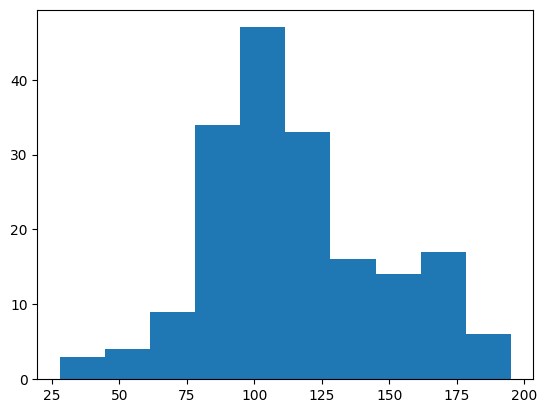

In [50]:
plt.hist(movies_1990s["duration"])
plt.show()

Add the title, and the X and Y axis labels. 
X axis = duration in minutes
Y axis = number of movies

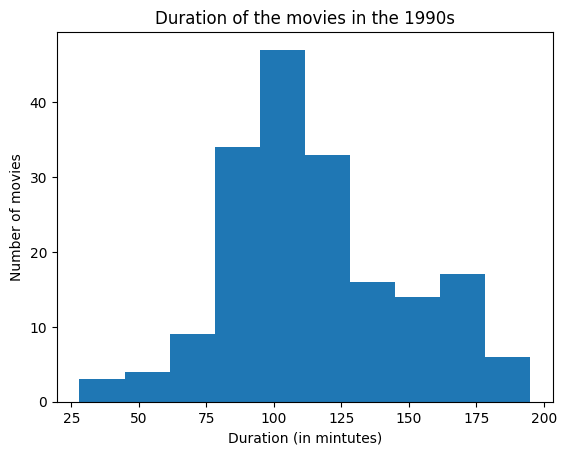

In [51]:
plt.hist(movies_1990s["duration"])
plt.title("Duration of the movies in the 1990s")
plt.xlabel("Duration (in mintutes)")
plt.ylabel("Number of movies")
plt.show()

Based on the plot, the most common duration is **100 minutes**. Since it's part of the instruction, save it in the `duration` variable.

In [52]:
duration = 100

## Short Action Movies

Next, we need to find all action movies in th3 1990s with duration that's shorter than 90 minutes. Find all movies with genre equals to action, then filter the duration.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("./netflix_data.csv")

## Get most common duration of 1990s movies 

movies = netflix_df[
  netflix_df["type"] == "Movie"
]

movies_1990s = movies[
  (movies["release_year"] >= 1990) & (movies["release_year"] < 2000)
]

duration = 100
print("Most frequent duration: " + str(duration))

## Get short action movies in the 1990s

action_movies_1990s = movies_1990s[
  movies_1990s["genre"] == "Action"
]

action_movies_1990s_short = action_movies_1990s[
  action_movies_1990s["duration"] < 90
]

print(action_movies_1990s_short.iloc[
  :,
  [2,7,8,-1]
])


## Count the number of short action movies in the 1990s 

short_movie_count = 0

for label, row in action_movies_1990s_short.iterrows():
  short_movie_count = short_movie_count + 1
    
print("Number of short action movies in the 1990s: " + str(short_movie_count))



Most frequent duration: 100
                          title  release_year  duration   genre
1288  EVANGELION: DEATH (TRUE)²          1998        69  Action
1698                       Hero          1997        89  Action
2328          Look Out, Officer          1990        88  Action
2993               Passenger 57          1992        84  Action
3297        Rumble in the Bronx          1995        89  Action
3806        The Bare-Footed Kid          1993        83  Action
3943      The End of Evangelion          1997        87  Action
Number of short action movies in the 1990s: 7
